## Evolutionary generalized model with adaptive behaviour 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed
from sympy.solvers import solve
from sympy import *

In [2]:
x,y,r1,r2,b12,b21 = symbols('x,y,r1,r2,b12,b21')
#
# Esta función sirve para:
# 1. Indicar las soluciones xsol,ysol de la ecuación X((r1+b12Y)-(a1+b12Yc1)X)==0 y Y((r2+b21X)-(a2+b21Xc2)Y)==0
# 2. Definir las funciones b12s y b21s, que representan a b12 y b21 en función de r1 y r1 y el trade-off (lineal)
# 3. Calcular las derivadas. Introducimos l como factor para diferenciar ambas derivadas.
#
def definitions(a1,a2,c1,c2,p1,q1,p2,q2,l):
        global xsol1,ysol1,xsol2,ysol2,b12s,b21s,ddr1,ddr2
        xsol1 = (-a1*a2 + b12*b21 + b21*c2*r1 - b12*c1*r2 +
                sqrt(4*b21*(b12*c1 + a1*c2)*(a2*r1 + b12*r2) +
                (a1*a2 - b21*(b12 + c2*r1) + b12*c1*r2)**2)) / (2*b21*(b12*c1 + a1*c2))
        ysol1 = (-a1*a2 + b12*b21 - b21*c2*r1 + b12*c1*r2 +
                sqrt(4*b21*(b12*c1 + a1*c2)*(a2*r1 + b12*r2) +
                (a1*a2 - b21*(b12 + c2*r1) + b12*c1*r2)**2)) / (2*b12*(a2*c1 + b21*c2))
        xsol2 = (-a1*a2 + b12*b21 + b21*c2*r1 - b12*c1*r2 -
                sqrt(4*b21*(b12*c1 + a1*c2)*(a2*r1 + b12*r2) +
                (a1*a2 - b21*(b12 + c2*r1) + b12*c1*r2)**2)) / (2*b21*(b12*c1 + a1*c2))
        ysol2 = (-a1*a2 + b12*b21 - b21*c2*r1 + b12*c1*r2 -
                sqrt(4*b21*(b12*c1 + a1*c2)*(a2*r1 + b12*r2) +
                (a1*a2 - b21*(b12 + c2*r1) + b12*c1*r2)**2)) / (2*b12*(a2*c1 + b21*c2))
        b12s = q1 - p1*r1
        b21s = q2 - p2*r2
        ddr1 = (diff(xsol1,r1) + diff(xsol1,b12)*diff(b12s,r1)).subs({b12:b12s,b21:b21s})
        ddr2 = l*(diff(ysol1,r2) + diff(ysol1,b21)*diff(b21s,r2)).subs({b12:b12s,b21:b21s})

In [3]:
#
# Inicializamos las listas de r1 y r2 con valores introducidos a mano. Luego inicializamos las listas de b12 y b21 despejando
# sus valores de b12s y b21s, sustituyendo lo que tenemos ahora como r1 y r2. Calculamos las poblaciones con estos valores.
#
def ini(rr1,rr2):
    global r1list,r2list,b12list,b21list,xolist,yolist
    r1list = [rr1]
    r2list = [rr2]
    b12list = [b12s.subs(r1,r1list[-1])]
    b21list = [b21s.subs(r2,r2list[-1])]
    xolist = [xsol1.subs({r1:r1list[-1],r2:r2list[-1],b12:b12list[-1],b21:b21list[-1]})]
    yolist = [ysol1.subs({r1:r1list[-1],r2:r2list[-1],b12:b12list[-1],b21:b21list[-1]})]

In [4]:
#
# Usamos como referencia el último valor de las listas r1 y r2 y con ellos calculamos: los nuevos valores de r1 y r2, en función
# de las derivadas; los nuevos valores de b12, b21 y las poblaciones, a partir de estos nuevos r1 y r2. Iteramos.
#
def bucle(pasos,escala):
    global r1list,r2list,b12list,b21list,xolist,yolist
    for i in range(pasos):
        r1u = r1list[-1]
        r2u = r2list[-1]
        r1list.append(r1u + escala*ddr1.subs({r1:r1u,r2:r2u})) # estamos usando una escala temporal ya que los cambios en los
        r2list.append(r2u + escala*ddr2.subs({r1:r1u,r2:r2u})) # parámetros se dan muy lentamente; facilita la visualización.
        b12list.append(b12s.subs(r1,r1list[-1]))
        b21list.append(b21s.subs(r2,r2list[-1]))
        xolist.append(xsol1.subs({r1:r1list[-1],r2:r2list[-1],b12:b12list[-1],b21:b21list[-1]}))
        yolist.append(ysol1.subs({r1:r1list[-1],r2:r2list[-1],b12:b12list[-1],b21:b21list[-1]}))

In [18]:
def plotnstats():
    plt.clf()
    plt.axhline(0, linewidth=0.75, color='black')
    plt.plot(range(len(r1list)),r1list,'c--')
    plt.plot(range(len(r2list)),r2list,'b-.')
    plt.plot(range(len(b12list)),[i*100 for i in b12list],'m-') # estoy multiplicando b12 y b21 por 100 para re-escalarlo
    plt.plot(range(len(b21list)),[i*100 for i in b21list],'y.') # y que aparezcan en el mismo rango de r1 y r2
    plt.legend(['r1','r2','b12($10^{-2}$)','b21($10^{-2}$)'], loc='best') # esto facilita la visualización de dichas variables 
    plt.axis('tight')
    plt.xlabel('Time (a.u.)')
    plt.ylabel('Control parameters')
    plt.show()
    plt.clf()
    plt.plot(range(len(xolist)),xolist,'g.')
    plt.plot(range(len(yolist)),yolist,'r.')
    plt.legend(['Xo','Yo'], loc='best')
    plt.axis('tight')
    plt.xlabel('Time (a.u.)')
    plt.ylabel('Population size')
    plt.show()

In [6]:
definitions(0.0001,0.0001,0.001,0.001,0.01,0.0005,0.01,0.0005,2)
ini(0.088,-0.5)
bucle(50,0.000001)

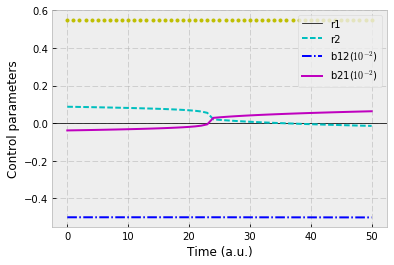

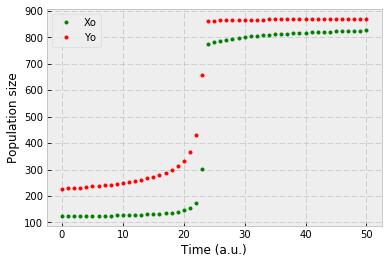

In [19]:
plt.style.use('bmh')
plotnstats()